In [1]:
import os
os.getcwd()

'C:\\Users\\SARAH_KAI_JP'

In [2]:
os.chdir(r'D:\Projects of Machine Learning\Linear Regression\Car Price Prediction\archive')

In [3]:
os.getcwd()

'D:\\Projects of Machine Learning\\Linear Regression\\Car Price Prediction\\archive'

## Importing Libraries

In [4]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('Display.max_column', 500)
pd.set_option('Display.max_row',500)

## Reading and Understanding the data

In [7]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#basic understandig of the data
print('There are {}rows and {}columns in the given data are'.format({car.shape[0]},{car.shape[1]}))
print('-'*80)
print(car.info())
print('-'*80)
print(car.describe())

There are {205}rows and {26}columns in the given data are
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14 

In [9]:
#Checking for the null values
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no missing values in the given data set.

## Exploratory Data Analysis

#### Univariant Analysis

In [10]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Total Number of car company  present in the data set are:  27
{'Toyota'} is the company which has maximum number of cars {31}
--------------------------------------------------------------------------------


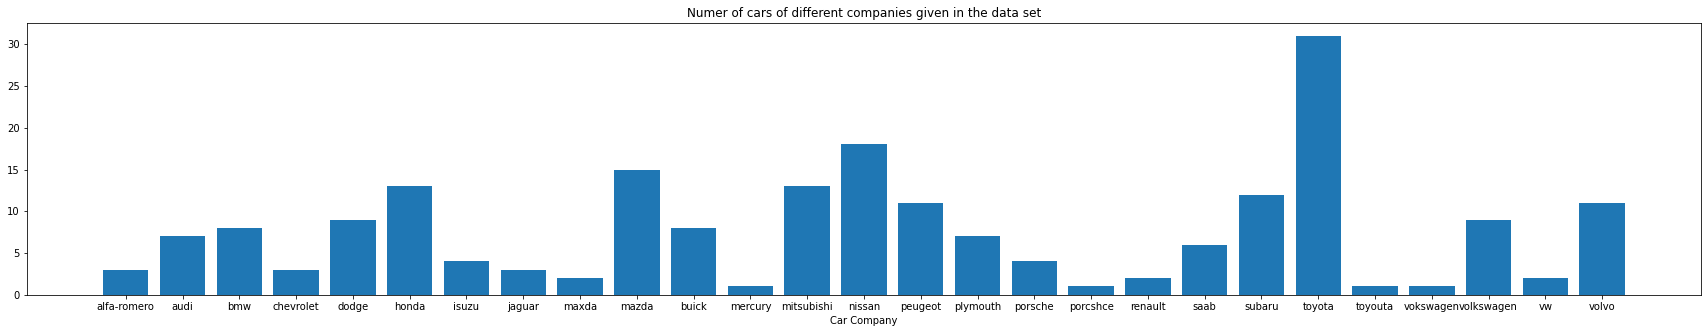

In [11]:
#Car_Name
car_company = []
for i in list(car.CarName):
    car_company.append(i.split()[0].lower())

count_car_company = {}
for j in car_company:
    count_car_company[j] = car_company.count(j)
    
car_name = ''
for k,m in count_car_company.items():
    if m == max(count_car_company.values()):
        car_name = k

print("Total Number of car company  present in the data set are: ", len(count_car_company))
print("{} is the company which has maximum number of cars {}".format({car_name.capitalize()},{max(count_car_company.values())}))
print('-'*80)


#ploting the graph
plt.figure(figsize = (30,5))
plt.bar(x = count_car_company.keys(), height= count_car_company.values())
plt.title('Numer of cars of different companies given in the data set')
plt.xlabel('Car Company')
plt.show()


SYMBOLING
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


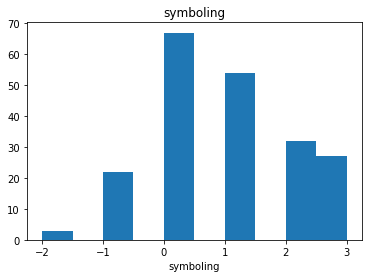

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
FUELTYPE
gas       185
diesel     20
Name: fueltype, dtype: int64


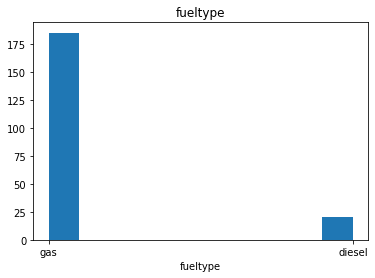

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
ASPIRATION
std      168
turbo     37
Name: aspiration, dtype: int64


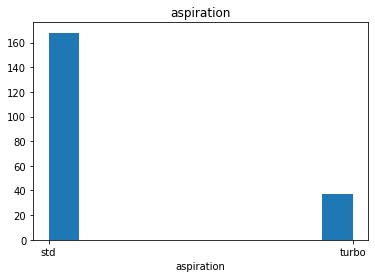

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
DOORNUMBER
four    115
two      90
Name: doornumber, dtype: int64


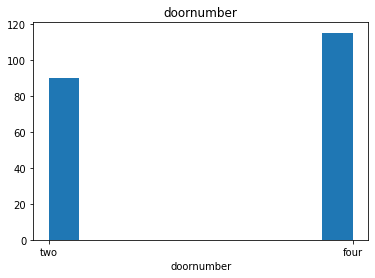

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
CARBODY
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


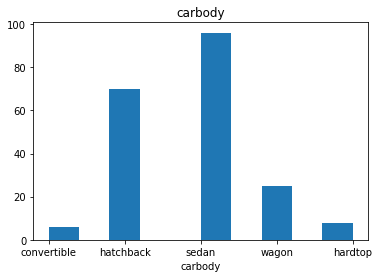

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
DRIVEWHEEL
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


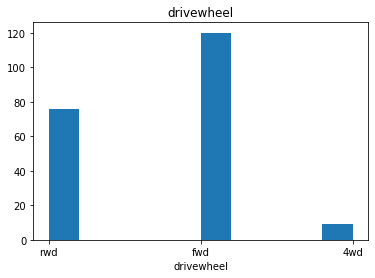

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
ENGINELOCATION
front    202
rear       3
Name: enginelocation, dtype: int64


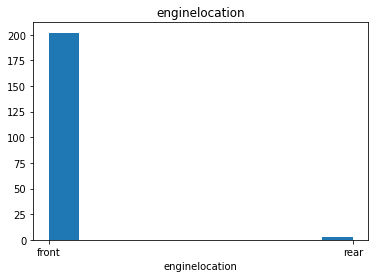

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
WHEELBASE
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64


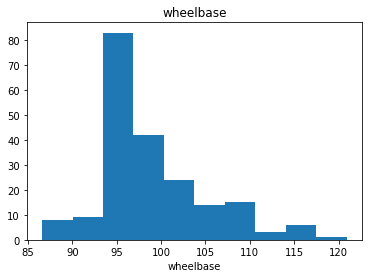

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
CARLENGTH
157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
165.3     6
177.8     6
176.2     6
186.6     6
172.0     5
176.8     5
175.6     5
173.2     5
169.0     4
198.9     4
168.9     4
172.4     4
168.7     4
170.7     3
192.7     3
159.1     3
155.9     3
150.0     3
169.7     3
175.4     3
158.7     3
167.3     2
173.0     2
183.5     2
187.8     2
173.5     2
184.6     2
173.4     2
170.2     2
180.2     2
173.6     2
168.8     2
189.0     2
190.9     2
144.6     2
174.6     2
199.6     2
166.8     2
175.0     2
167.5     2
202.6     2
176.6     2
177.3     1
178.2     1
159.3     1
157.1     1
165.7     1
193.8     1
197.0     1
141.1     1
158.8     1
183.1     1
163.4     1
171.2     1
156.9     1
157.9     1
178.4     1
169.1     1
181.5     1
175.7     1
172.6     1
191.7     1
178.5     1
181.7     1
162.4     1
165.6     1
187.5     1
180.3

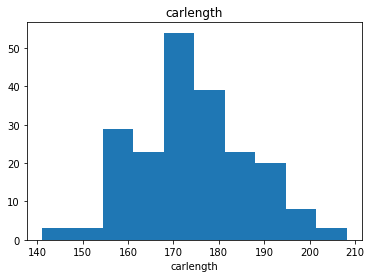

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
CARWIDTH
63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64


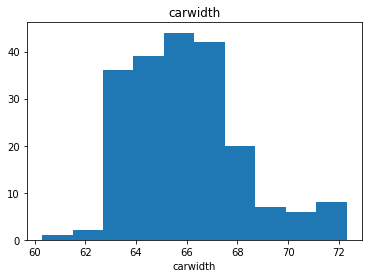

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
CARHEIGHT
50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: carheight, dtype: int64


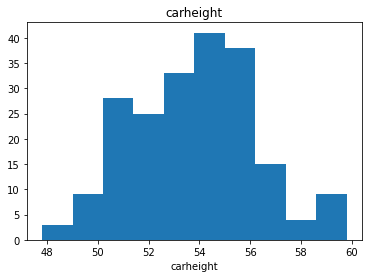

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
CURBWEIGHT
2385    4
1918    3
2275    3
1989    3
2410    2
2191    2
2535    2
2024    2
2414    2
4066    2
2380    2
3139    2
2756    2
1967    2
3075    2
2145    2
2290    2
2403    2
2579    2
2300    2
2548    2
2128    2
3230    2
2337    2
2395    2
1876    2
3252    2
1909    2
1874    2
2319    1
3157    1
2240    1
2952    1
2190    1
2340    1
2510    1
2420    1
2455    1
2050    1
2650    1
3045    1
1985    1
2040    1
2120    1
2847    1
2280    1
2808    1
2758    1
2707    1
2695    1
2658    1
2460    1
3049    1
3366    1
2800    1
3012    1
3217    1
2778    1
2818    1
3130    1
2015    1
3110    1
2212    1
2976    1
2975    1
2326    1
2912    1
2480    1
2563    1
2458    1
3016    1
2081    1
3131    1
3151    1
2661    1
2261    1
2209    1
2264    1
2714    1
2679    1
2551    1
2536    1
2254    1
3485    1
2540    1
3034    1
2935    

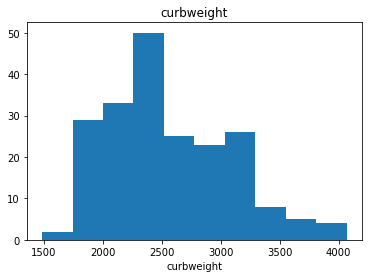

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
ENGINETYPE
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


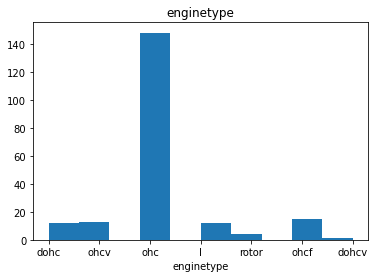

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
CYLINDERNUMBER
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


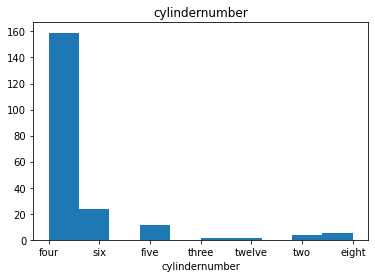

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
ENGINESIZE
122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: enginesize, dtype: int64


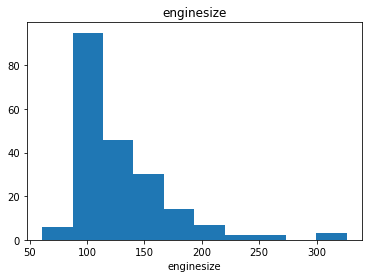

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
FUELSYSTEM
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


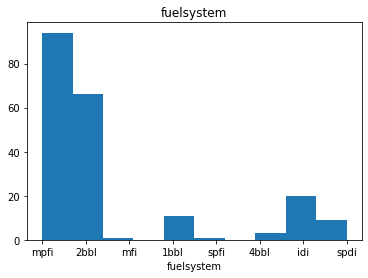

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
BORERATIO
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.58     6
3.39     6
3.33     6
3.05     6
3.54     6
3.70     5
3.01     5
3.35     4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.63     2
3.13     2
3.80     2
3.50     2
2.54     1
3.08     1
3.61     1
3.34     1
2.68     1
3.60     1
2.92     1
3.76     1
2.99     1
Name: boreratio, dtype: int64


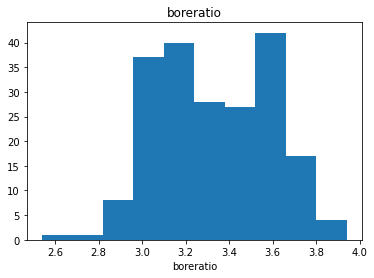

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
STROKE
3.400    20
3.230    14
3.150    14
3.030    14
3.390    13
2.640    11
3.290     9
3.350     9
3.460     8
3.110     6
3.270     6
3.410     6
3.070     6
3.580     6
3.190     6
3.500     6
3.640     5
3.520     5
3.860     4
3.540     4
3.470     4
3.255     4
3.900     3
2.900     3
3.100     2
4.170     2
2.800     2
2.190     2
3.080     2
2.680     2
2.360     1
3.160     1
2.070     1
3.210     1
3.120     1
2.760     1
2.870     1
Name: stroke, dtype: int64


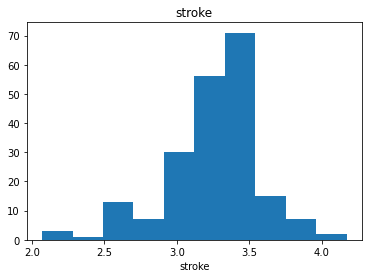

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
COMPRESSIONRATIO
9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compressionratio, dtype: int64


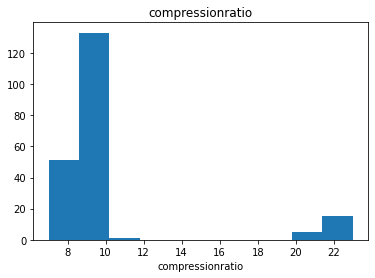

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
HORSEPOWER
68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64


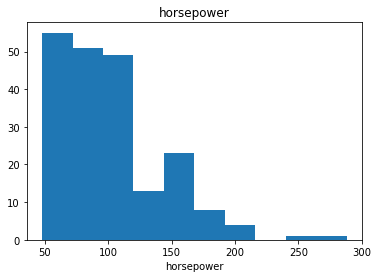

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
PEAKRPM
5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5800     7
5250     7
5100     5
4150     5
4200     5
4350     4
4750     4
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peakrpm, dtype: int64


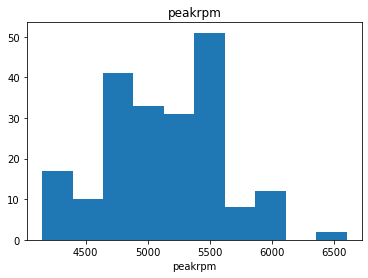

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
CITYMPG
31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: citympg, dtype: int64


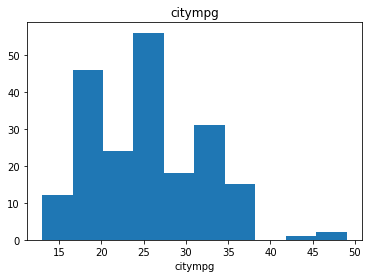

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
HIGHWAYMPG
25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highwaympg, dtype: int64


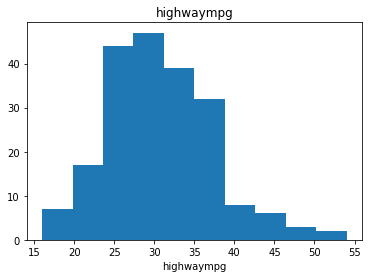

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [12]:
car_col = list(car.columns)
car_col.pop(0) #removing car_ID
car_col.pop(1) #removing Carname as already done
car_col.pop(-1) #removing target variable

for i in car_col:
    print(i.upper())
    print(car[i].value_counts())
    #ploting the graph
    plt.hist(x= car[i] )
    plt.title(i)
    plt.xlabel(i)
    plt.show()
    
    print("*-*-"*30)


#### Bivariant Analysis

In [13]:
###dropping car_id  from the dataset
car = car.drop(['car_ID'], axis = 1)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
cat_col = []
num_col = []
for i in car.columns:
    if car[i].dtype == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)

In [15]:
print("Categorical Columns are: ", cat_col )
print("Numerical Columns are: ", num_col )

Categorical Columns are:  ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical Columns are:  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [16]:
#target col
target_col = num_col.pop(-1)

Scatter Plot for  symboling


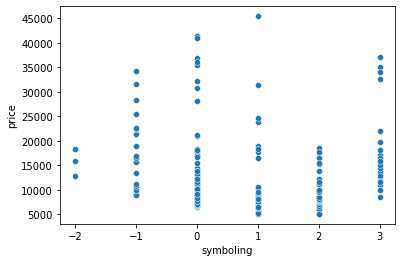

------------------------------
Scatter Plot for  wheelbase


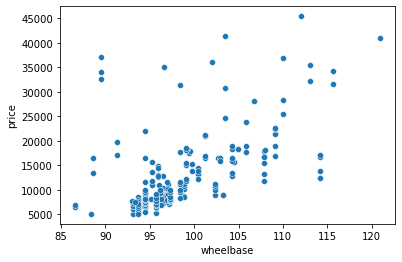

------------------------------
Scatter Plot for  carlength


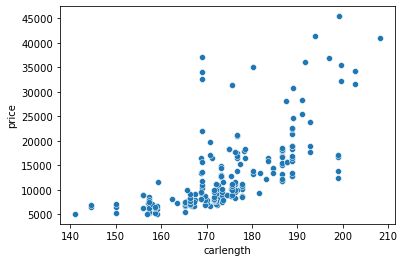

------------------------------
Scatter Plot for  carwidth


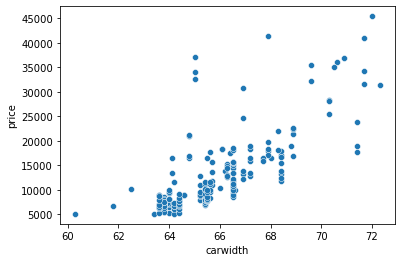

------------------------------
Scatter Plot for  carheight


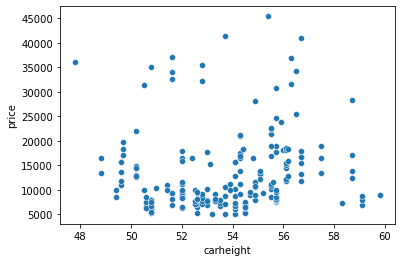

------------------------------
Scatter Plot for  curbweight


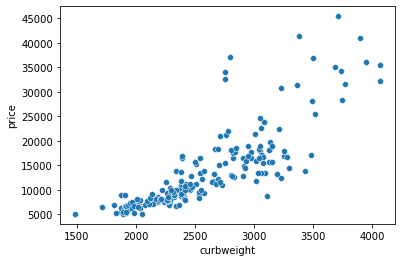

------------------------------
Scatter Plot for  enginesize


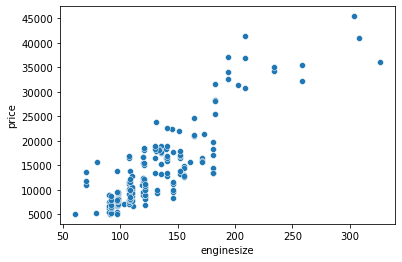

------------------------------
Scatter Plot for  boreratio


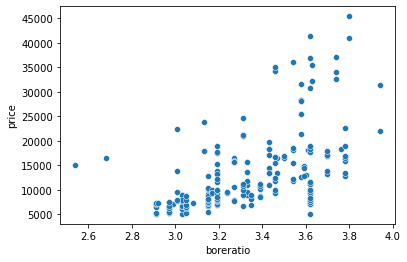

------------------------------
Scatter Plot for  stroke


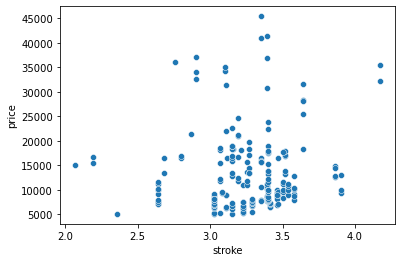

------------------------------
Scatter Plot for  compressionratio


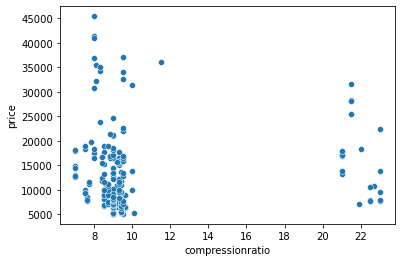

------------------------------
Scatter Plot for  horsepower


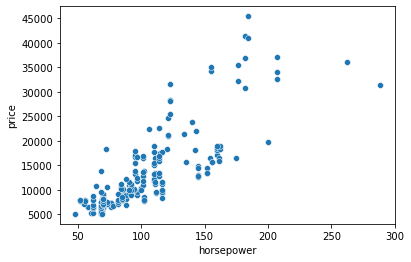

------------------------------
Scatter Plot for  peakrpm


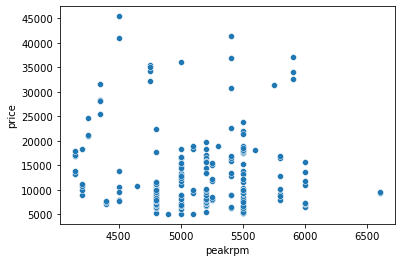

------------------------------
Scatter Plot for  citympg


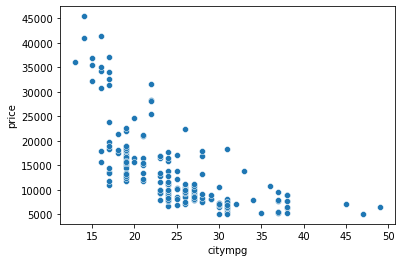

------------------------------
Scatter Plot for  highwaympg


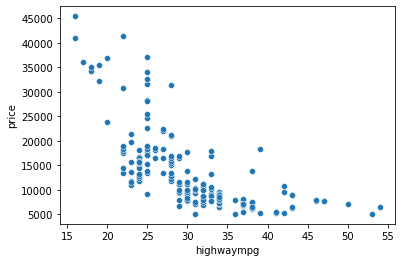

------------------------------


In [17]:
# Scatter plot for Numerical Columns
for i in num_col:
    print("Scatter Plot for ",i)
    sns.scatterplot(x = car[i], y = car[target_col])
    plt.show()
    print('-'*30)

Box Plot for  CarName


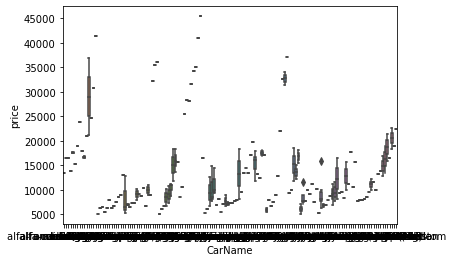

------------------------------
Box Plot for  fueltype


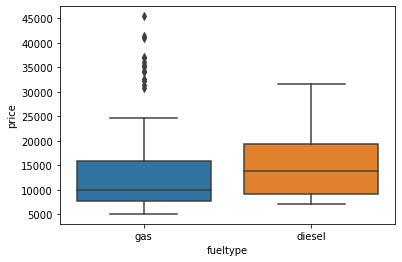

------------------------------
Box Plot for  aspiration


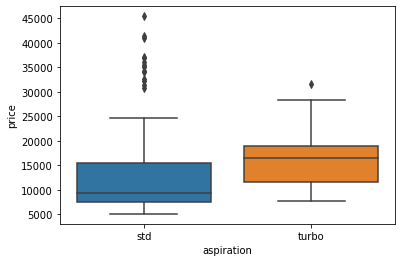

------------------------------
Box Plot for  doornumber


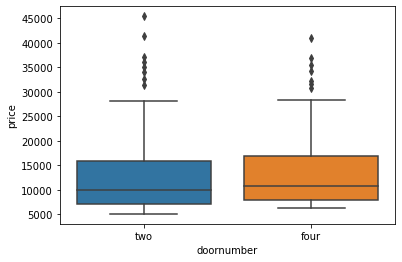

------------------------------
Box Plot for  carbody


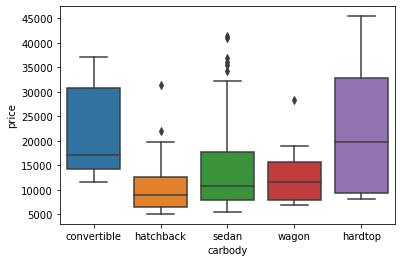

------------------------------
Box Plot for  drivewheel


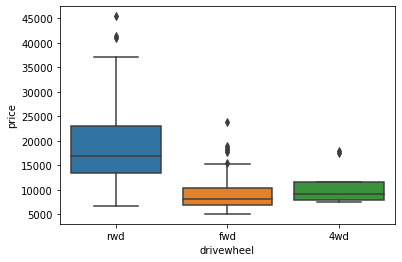

------------------------------
Box Plot for  enginelocation


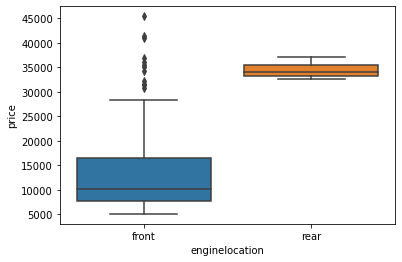

------------------------------
Box Plot for  enginetype


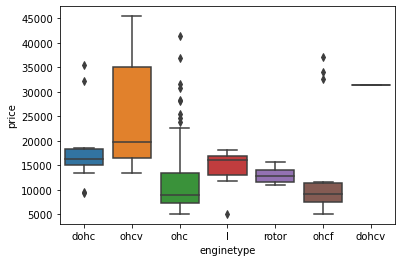

------------------------------
Box Plot for  cylindernumber


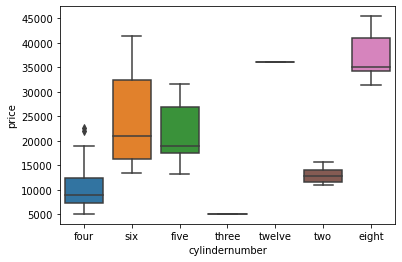

------------------------------
Box Plot for  fuelsystem


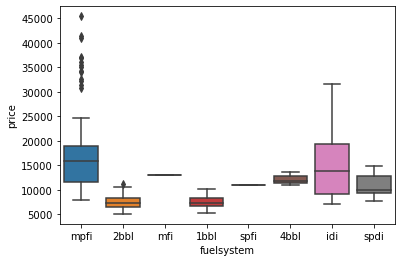

------------------------------


In [18]:
#box plot for categorical columns
for i in cat_col:
    print("Box Plot for ",i)
    sns.boxplot(x = car[i], y = car[target_col])
    plt.show()
    print('-'*30)

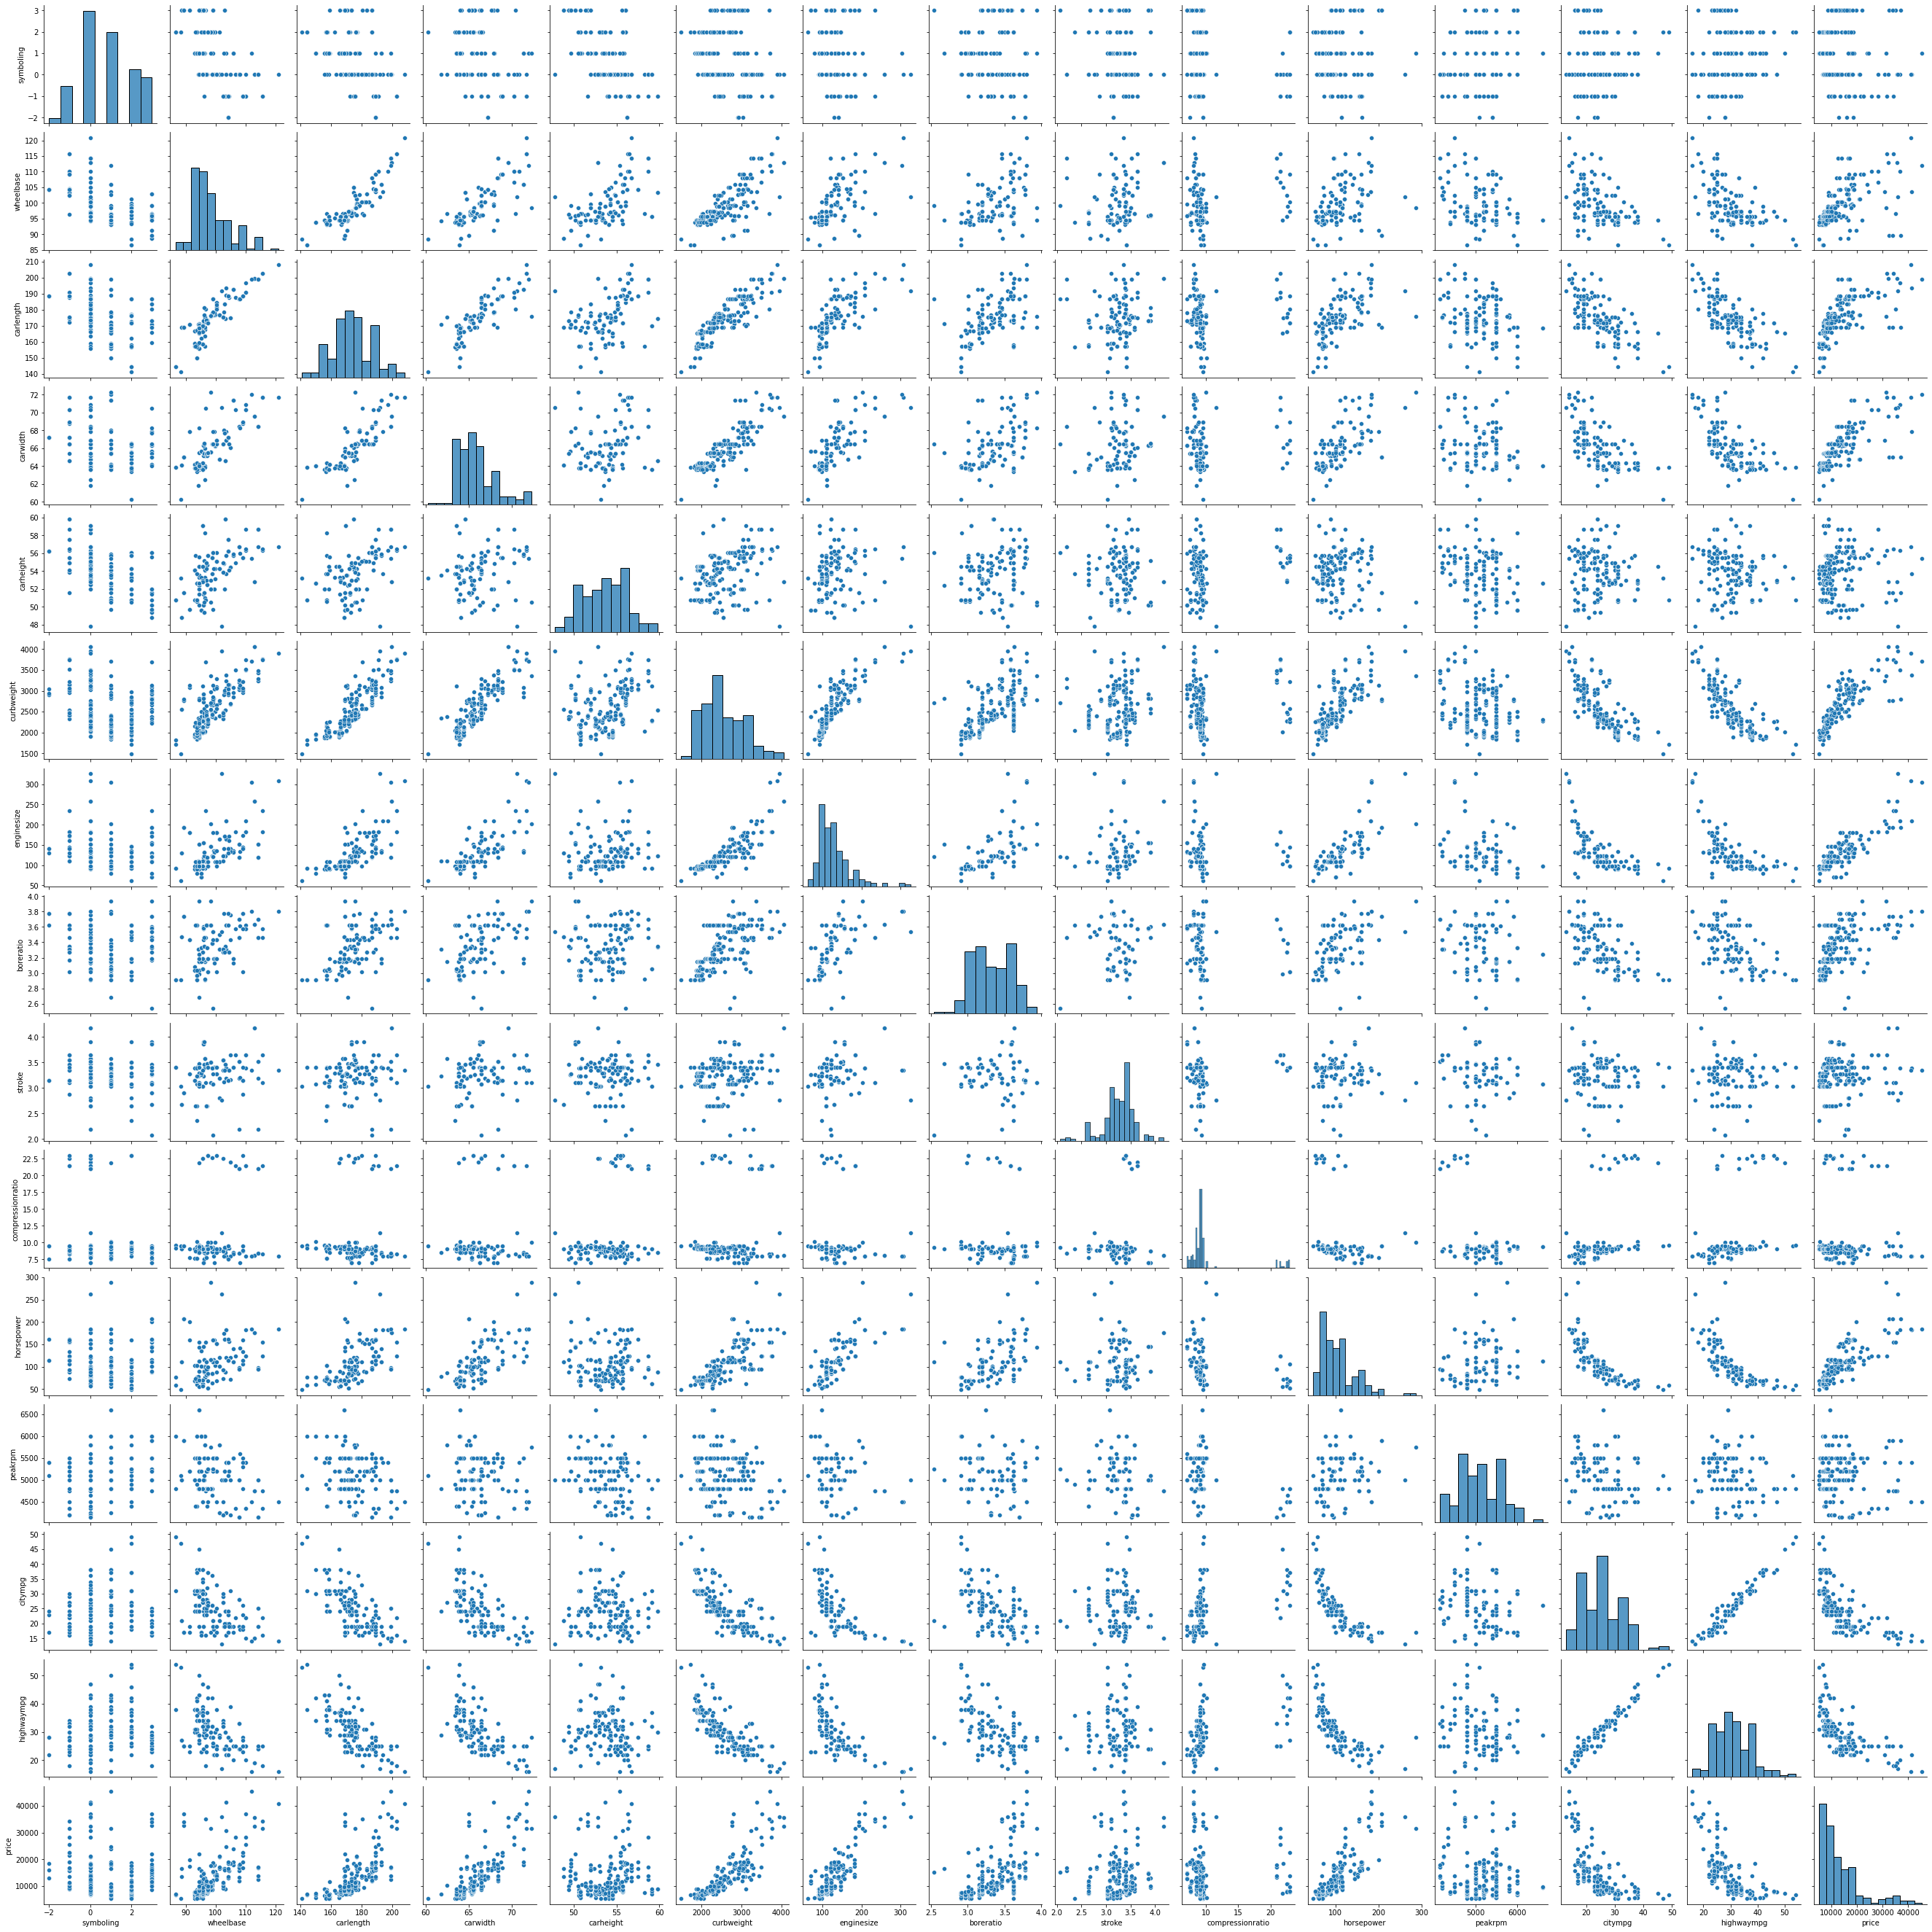

In [19]:
# pairplot 
sns.pairplot(car)

Linear relationship can be seen among the variables with the target variables. 

## Data Preprocessing

In [20]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
#dropping car name from the dataset
car = car.drop('CarName', axis = 1)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Creating Dummy variables

In [22]:
car.fueltype = car.fueltype.map({'gas':0, 'diesel':1})
car.aspiration = car.aspiration.map({'std':0, 'turbo':1})
car.doornumber = car.doornumber.map({'two':0,'four':1})
car.drivewheel = car.drivewheel.map({'rwd':0,'fwd':1,'4wd':2})
car.carbody = car.carbody.map({'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4})
car.enginelocation = car.enginelocation.map({'front':0, 'rear':1})

car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,4,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,4,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,1,0,2,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
#enginetype
dummy_enginetype = pd.get_dummies(car.enginetype, prefix='EngineType')
car = pd.concat([car,dummy_enginetype], axis =1)
car = car.drop('enginetype',axis =1)

#Cylindernumber
dummy_cylindernumber = pd.get_dummies(car.cylindernumber, prefix='CylinderNumber')
car = pd.concat([car,dummy_cylindernumber], axis =1)
car = car.drop('cylindernumber',axis =1)

#FuelSystem
dummy_fuelsystem = pd.get_dummies(car.fuelsystem, prefix='FuelSystem')
car = pd.concat([car,dummy_fuelsystem], axis =1)
car = car.drop('fuelsystem',axis =1)

In [24]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,EngineType_dohc,EngineType_dohcv,EngineType_l,EngineType_ohc,EngineType_ohcf,EngineType_ohcv,EngineType_rotor,CylinderNumber_eight,CylinderNumber_five,CylinderNumber_four,CylinderNumber_six,CylinderNumber_three,CylinderNumber_twelve,CylinderNumber_two,FuelSystem_1bbl,FuelSystem_2bbl,FuelSystem_4bbl,FuelSystem_idi,FuelSystem_mfi,FuelSystem_mpfi,FuelSystem_spdi,FuelSystem_spfi
0,3,0,0,0,4,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,4,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,2,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
print('After creating dummy variables, {} columns and {} rows are present'.format({car.shape[1]},{car.shape[0]}))

After creating dummy variables, {43} columns and {205} rows are present


## Splitting data into train and test

In [26]:
y = car.pop('price')
X= car

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state=100)

In [28]:
X_train.shape, y_train.shape

((143, 42), (143,))

In [29]:
X_test.shape, y_test.shape

((62, 42), (62,))

#### Scaling the data using StandardScaler

In [30]:
scaler = StandardScaler()
#columns which needs to be scaled
scaled_col = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
              'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,EngineType_dohc,EngineType_dohcv,EngineType_l,EngineType_ohc,EngineType_ohcf,EngineType_ohcv,EngineType_rotor,CylinderNumber_eight,CylinderNumber_five,CylinderNumber_four,CylinderNumber_six,CylinderNumber_three,CylinderNumber_twelve,CylinderNumber_two,FuelSystem_1bbl,FuelSystem_2bbl,FuelSystem_4bbl,FuelSystem_idi,FuelSystem_mfi,FuelSystem_mpfi,FuelSystem_spdi,FuelSystem_spfi
122,1,0,0,1,0,1,0,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
125,3,0,0,0,1,0,0,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
166,1,0,0,0,1,0,0,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,4,0,0,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
199,-1,0,1,1,2,0,0,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
X_test[scaled_col] =scaler.transform(X_test[scaled_col])
X_test.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,EngineType_dohc,EngineType_dohcv,EngineType_l,EngineType_ohc,EngineType_ohcf,EngineType_ohcv,EngineType_rotor,CylinderNumber_eight,CylinderNumber_five,CylinderNumber_four,CylinderNumber_six,CylinderNumber_three,CylinderNumber_twelve,CylinderNumber_two,FuelSystem_1bbl,FuelSystem_2bbl,FuelSystem_4bbl,FuelSystem_idi,FuelSystem_mfi,FuelSystem_mpfi,FuelSystem_spdi,FuelSystem_spfi
160,0,0,0,1,0,1,0,-0.475189,-0.566894,-0.652569,-0.227502,-0.820850,-0.660242,-0.451443,-0.706633,-0.278345,-0.822372,-0.688236,1.887918,2.320526,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
186,2,0,0,1,0,1,0,-0.205872,-0.136752,-0.154030,0.885789,-0.487359,-0.390836,-0.451443,0.481417,-0.278345,-0.443427,0.250069,0.240833,0.449816,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
59,1,0,0,0,1,1,0,0.046613,0.349149,0.299187,0.061129,-0.284685,-0.072447,0.317543,0.449308,-0.384120,-0.468690,-0.688236,0.091098,0.162014,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
165,1,0,0,0,0,0,0,-0.677177,-0.375720,-0.833856,-0.392434,-0.505784,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
140,2,0,0,0,1,2,0,-0.879165,-1.283797,-0.924500,0.885789,-0.551846,-0.415328,1.201877,-1.958901,-0.357676,-0.746583,-1.522285,0.091098,0.018113,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## Linear Regression Models

In [32]:
linear_regression = LinearRegression()
rfe = RFE(linear_regression, n_features_to_select=20)
selector = rfe.fit(X_train, y_train)
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
20,1,True,EngineType_dohc
31,1,True,CylinderNumber_three
29,1,True,CylinderNumber_four
26,1,True,EngineType_rotor
25,1,True,EngineType_ohcv
23,1,True,EngineType_ohc
21,1,True,EngineType_dohcv
40,1,True,FuelSystem_spdi
17,1,True,peakrpm
32,1,True,CylinderNumber_twelve


In [33]:
# Defining function for OLS and VIF
def ols_fit(y,X):
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model

def vif(X):
    X_train_sm = sm.add_constant(X)
    vif = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index = X_train_sm.columns).reset_index()
    print(vif_frame.sort_values(by ='vif',ascending =False))

In [34]:
#Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1, 'features'].values
selected_features

array(['EngineType_dohc', 'CylinderNumber_three', 'CylinderNumber_four',
       'EngineType_rotor', 'EngineType_ohcv', 'EngineType_ohc',
       'EngineType_dohcv', 'FuelSystem_spdi', 'peakrpm',
       'CylinderNumber_twelve', 'stroke', 'boreratio', 'horsepower',
       'CylinderNumber_two', 'fueltype', 'aspiration', 'carwidth',
       'FuelSystem_idi', 'enginesize', 'enginelocation'], dtype=object)

In [35]:
# Model1: 
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     106.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.95e-66
Time:                        05:32:08   Log-Likelihood:                -1284.2
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     124   BIC:                             2663.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7333.58

In [36]:
selected_features = selected_features[(selected_features!='EngineType_dohc')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           7.94e-67
Time:                        05:32:08   Log-Likelihood:                -1285.4
No. Observations:                 143   AIC:                             2607.
Df Residuals:                     125   BIC:                             2660.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6781.52

In [37]:
selected_features = selected_features[(selected_features!='EngineType_dohcv')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     117.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.24e-67
Time:                        05:32:08   Log-Likelihood:                -1286.0
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     126   BIC:                             2656.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6877.96

In [38]:
selected_features = selected_features[(selected_features!='horsepower')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.86e-68
Time:                        05:32:08   Log-Likelihood:                -1287.1
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     127   BIC:                             2654.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7264.55

In [39]:
selected_features = selected_features[(selected_features!='fueltype')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.86e-68
Time:                        05:32:08   Log-Likelihood:                -1287.1
No. Observations:                 143   AIC:                             2606.
Df Residuals:                     127   BIC:                             2654.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7264.55

In [40]:
selected_features = selected_features[(selected_features!='FuelSystem_idi')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.64e-68
Time:                        05:32:08   Log-Likelihood:                -1289.3
No. Observations:                 143   AIC:                             2609.
Df Residuals:                     128   BIC:                             2653.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7384.20

In [41]:
vif(X_train[selected_features])

                    index        vif
3        EngineType_rotor        inf
11     CylinderNumber_two        inf
0                   const  31.429445
14             enginesize  17.165322
2     CylinderNumber_four   6.399777
10              boreratio   5.043166
13               carwidth   4.103431
9                  stroke   3.026765
8   CylinderNumber_twelve   2.503039
5          EngineType_ohc   2.415485
4         EngineType_ohcv   1.937924
12             aspiration   1.762560
1    CylinderNumber_three   1.573695
6         FuelSystem_spdi   1.515641
7                 peakrpm   1.384721
15         enginelocation   1.248942


In [42]:
selected_features = selected_features[(selected_features!='EngineType_rotor')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.64e-68
Time:                        05:32:09   Log-Likelihood:                -1289.3
No. Observations:                 143   AIC:                             2609.
Df Residuals:                     128   BIC:                             2653.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7384.20

In [43]:
vif(X_train[selected_features])

                    index        vif
0                   const  31.429445
13             enginesize  17.165322
2     CylinderNumber_four   6.399777
9               boreratio   5.043166
12               carwidth   4.103431
10     CylinderNumber_two   3.800002
8                  stroke   3.026765
7   CylinderNumber_twelve   2.503039
4          EngineType_ohc   2.415485
3         EngineType_ohcv   1.937924
11             aspiration   1.762560
1    CylinderNumber_three   1.573695
5         FuelSystem_spdi   1.515641
6                 peakrpm   1.384721
14         enginelocation   1.248942


In [44]:
selected_features = selected_features[(selected_features!='enginesize')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     45.90
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           5.81e-42
Time:                        05:32:09   Log-Likelihood:                -1360.6
No. Observations:                 143   AIC:                             2749.
Df Residuals:                     129   BIC:                             2791.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.809e+

In [45]:
selected_features = selected_features[(selected_features!='EngineType_ohcv')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     50.11
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           8.02e-43
Time:                        05:32:09   Log-Likelihood:                -1360.6
No. Observations:                 143   AIC:                             2747.
Df Residuals:                     130   BIC:                             2786.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.807e+

In [46]:
selected_features = selected_features[(selected_features!='stroke')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     55.07
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.07e-43
Time:                        05:32:09   Log-Likelihood:                -1360.6
No. Observations:                 143   AIC:                             2745.
Df Residuals:                     131   BIC:                             2781.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.803e+

In [47]:
selected_features = selected_features[(selected_features!='peakrpm')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     60.95
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.43e-44
Time:                        05:32:09   Log-Likelihood:                -1360.7
No. Observations:                 143   AIC:                             2743.
Df Residuals:                     132   BIC:                             2776.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.801e+

In [48]:
selected_features = selected_features[(selected_features!='FuelSystem_spdi')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     68.15
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.80e-45
Time:                        05:32:09   Log-Likelihood:                -1360.8
No. Observations:                 143   AIC:                             2742.
Df Residuals:                     133   BIC:                             2771.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.804e+

In [49]:
selected_features = selected_features[(selected_features!='CylinderNumber_three')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     77.00
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           2.37e-46
Time:                        05:32:09   Log-Likelihood:                -1360.9
No. Observations:                 143   AIC:                             2740.
Df Residuals:                     134   BIC:                             2767.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.783e+

In [50]:
selected_features = selected_features[(selected_features!='aspiration')]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     87.97
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.68e-47
Time:                        05:32:10   Log-Likelihood:                -1361.4
No. Observations:                 143   AIC:                             2739.
Df Residuals:                     135   BIC:                             2762.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.786e+

In [51]:
vif(X_train[selected_features])

                   index       vif
0                  const  8.234228
6               carwidth  2.696883
4              boreratio  2.262298
1    CylinderNumber_four  2.106995
2         EngineType_ohc  1.575051
5     CylinderNumber_two  1.206007
7         enginelocation  1.129141
3  CylinderNumber_twelve  1.047682


## Final Model

In [52]:
linear_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     87.97
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.68e-47
Time:                        05:32:10   Log-Likelihood:                -1361.4
No. Observations:                 143   AIC:                             2739.
Df Residuals:                     135   BIC:                             2762.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.786e+

## Residual Analysis

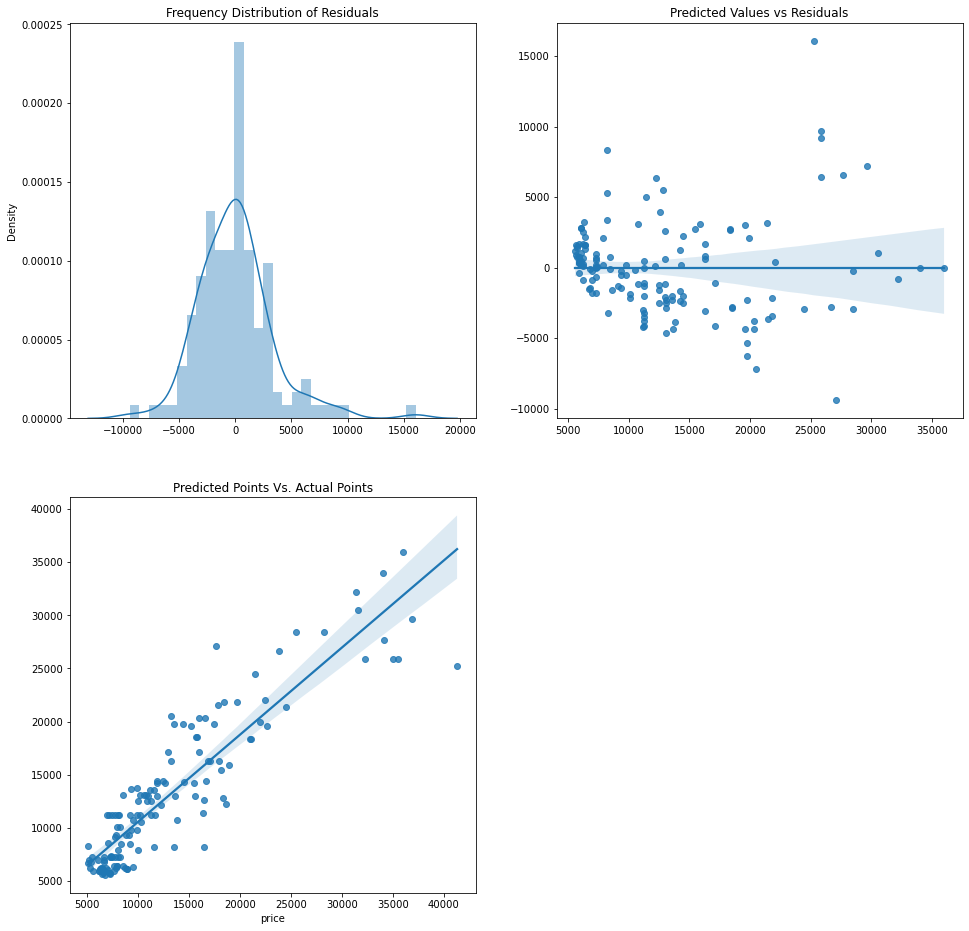

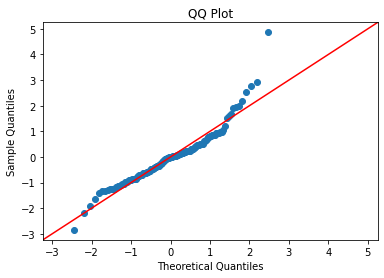

In [53]:
X_train_sm = sm.add_constant(X_train[selected_features])
y_train_pred = linear_model.predict(X_train_sm)

plt.figure(figsize = (16,16))

#checking for Normally distributed
plt.subplot(2,2,1)
sns.distplot(y_train-y_train_pred, bins=30)
plt.title('Frequency Distribution of Residuals')
#Checking for Independence of Errors
plt.subplot(2,2,2)
sns.regplot(y_train_pred,y_train-y_train_pred)
plt.title('Predicted Values vs Residuals')
#Checking for Homoscedasticity
plt.subplot(2,2,3)
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')

#Checking for normal distribution using qqplot
sm.qqplot(y_train-y_train_pred, fit=True,line='45')
plt.title ('QQ Plot')

plt.show()

## Evaluation

In [54]:
X_test = X_test[selected_features]

X_test = sm.add_constant(X_test)
y_test_pred = linear_model.predict(X_test)

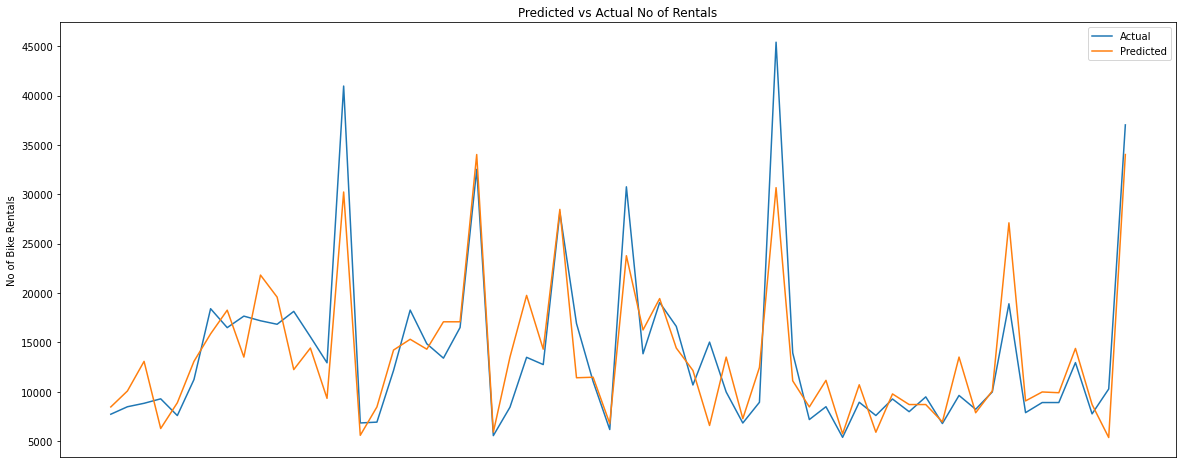

In [55]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

In [56]:
from sklearn.metrics import r2_score
# R2 Score
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print(f'R-squared for train data: {rsquared_train}')
print(f'R-squared for test data: {rsquared_test}')

R-squared for train data: 0.8201976440363776
R-squared for test data: 0.7908823693717082
